In [1]:
from controllers import *
#open(os.path.join('Aspen Stuff', 'stop.txt'), 'w').close()


In [2]:
wipeFolder('Aspen Stuff')
%matplotlib widget
#p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 = [200,200,400,1000,2.5 ,250,250  ,200,1000  ,0.5]
#p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 = 1e4*np.array([0.6357972255156994,96707.55554749382,1.0790583979938957,60.86066360843278,0.0002578547214190546 ,17.5124842176659,101949.56051420174  ,104.37657105590257,3.128718017349537  ,0.000010846300887665446])
# p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 = 1e4*np.array([0.0022651943949355755, 99862.1425902443,0.0037207980131110587,0.23169361065482735, 99997.5847989014,0.12560566345806118,58.34210398144645,2.3147505112012268,5.8635314442677045,98975.1811344455])
# p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 = 1e6*np.array([0.0009702344234737915,1.1216300873784233,0.0015283028135708204,1.1220321466763308,0.0000003056064046823101,0.0012133090221050846,1.1216300873784233,0.0019023081463311001,1.1216838484014913,0.00000022497017009016127])

# P matrix values: P is a Positive definite 10x10 real matrix 
P1 = 200
P2= 250
P3= 2500
P4=10
P5=0.25
P6=1000
P7=1000
P8=500
P9=1
P10=0.5

# k_1,k_2,k_3 = 1500898.8475089157, 51911.41903311291, 4.166999999999997
# #E_1,E_2,E_3 = 7.94305039e+04,7.96897538e+04,1.24494237e+05
# Cp1,Cp2 = 1.8097737040262707, 2.6356562630366525


File does not exist: c:\Users\arthu\JupyterNotebook\Code\MPC\Aspen\Aspen Stuff\greenLightAspen
File does not exist: c:\Users\arthu\JupyterNotebook\Code\MPC\Aspen\Aspen Stuff\greenLightPython
File does not exist: c:\Users\arthu\JupyterNotebook\Code\MPC\Aspen\Aspen Stuff\u.txt
File does not exist: c:\Users\arthu\JupyterNotebook\Code\MPC\Aspen\Aspen Stuff\dynamicValues.txt
File deletion process completed.


In [4]:
from controllers import *
%matplotlib widget
# controlStepSize = 100
# hcMPC = 0.3
#Process time is 6hr
#Sampling time is 30 seconds
#Integration timestep is 0.3s


netSteps = netPIControlTimeSteps
targetTemps = np.array([50.0,100.0])
Kc=np.array([500.0, 1500.0])
Ki=np.array([0.1, 0.1])

# Initial Values
initialValues = np.loadtxt(os.path.join('Aspen Stuff', 'initialValues.txt'), delimiter=",")
C_B1_i   = initialValues[0,0] - C_B1s    # kmol/m3
C_DEB1_i = initialValues[0,1] - C_DEB1s  # kmol/m3
C_E1_i   = initialValues[0,2] - C_E1s    # kmol/m3
C_EB1_i  = initialValues[0,3] - C_EB1s   # kmol/m3
T_1_i    = initialValues[0,4] - T_1s     # K
C_B2_i   = initialValues[1,0] - C_B2s    # kmol/m3
C_DEB2_i = initialValues[1,1] - C_DEB2s  # kmol/m3
C_E2_i   = initialValues[1,2] - C_E2s    # kmol/m3
C_EB2_i  = initialValues[1,3] - C_EB2s   # kmol/m3
T_2_i    = initialValues[1,4] - T_2s     # K

# Initialize the state, control, and error Records
stateRecord = np.zeros((2,5,netSteps+1))
stateRecord[0,0,0] = C_B1_i 
stateRecord[0,1,0] = C_DEB1_i
stateRecord[0,2,0] = C_E1_i
stateRecord[0,3,0] = C_EB1_i
stateRecord[0,4,0] = T_1_i
stateRecord[1,0,0] = C_B2_i
stateRecord[1,1,0] = C_DEB2_i
stateRecord[1,2,0] = C_E2_i
stateRecord[1,3,0] = C_EB2_i
stateRecord[1,4,0] = T_2_i

#Steady State Values of state variables
Q1d     = Q_(-306.00127008393844 ,'kJ/s').magnitude                - Q1s
Q2d     = Q_(-519.6721950335846 ,'kJ/s').magnitude              - Q2s
C_B1d   = Q_(5.7227369200741904 ,'kmol/m^3').magnitude      - C_B1s    # kmol/m3
C_DEB1d = Q_(3.7847819651713003e-05 ,'kmol/m^3').magnitude - C_DEB1s  # kmol/m3
C_E1d   = Q_(9.4830667871228003e-01 ,'kmol/m^3').magnitude      - C_E1s    # kmol/m3
C_EB1d  = Q_(9.6137458085552596e-01 ,'kmol/m^3').magnitude     - C_EB1s   # kmol/m3
T_1d    = Q_(3.5021535778966199e+02 ,'K').magnitude             - T_1s     # K
C_B2d   = Q_(4.2242089099114501 ,'kmol/m^3').magnitude      - C_B2s    # kmol/m3
C_DEB2d = Q_(2.1677362152708099e-04 ,'kmol/m^3').magnitude - C_DEB2s  # kmol/m3
C_E2d   = Q_(1.6699014297496406e-01 ,'kmol/m^3').magnitude       - C_E2s    # kmol/m3
C_EB2d  = Q_(1.6460876946348100 ,'kmol/m^3').magnitude      - C_EB2s   # kmol/m3
T_2d    = Q_(4.0050873892022503e+02 ,'K').magnitude             - T_2s     # K

controlRecord = np.zeros((2,netSteps))
costRecord = np.zeros((netSteps))
errorRecord = [[] for _ in controlRecord]

###########Q Matrices for Cost Function##############
# Qx=np.diag(np.tile([2e3, 1], int(NUM_OUTPUTS/2)))
# Qu=np.diag(np.tile([8e-13, 0.001], int(NUM_OUTPUTS/2)))
loopsPerHour = int(((1.0*60*60)/hcPI)/controlStepSize)
A1 = np.repeat(10*np.ones(6),loopsPerHour)
A2 = np.repeat(10*np.ones(6),loopsPerHour)
A3 = np.repeat(1e-8*np.ones(6),loopsPerHour)
A4 = 0.08
A5 = 0.1
# A1 = np.repeat(10*np.array([1, 0.9, 1.1, 0.8, 1.2, 0.7]),loopsPerHour)
# A2 = np.repeat(1e-8*np.array([1, 0.8 , 1.2, 0.6 , 1.4,0.5]),loopsPerHour)

# Storing the steady state values in 2 arrays
x_ss = np.array([[ C_B1s,C_DEB1s, C_E1s,C_EB1s,  T_1s], [ C_B2s,C_DEB2s,C_E2s, C_EB2s,  T_2s]])
print(f"The steady state values are {x_ss}")

# Transfer the initial values into realtime array, wont store the data permanently, created record lists for that.
currentState = np.array([[ C_B1_i,C_DEB1_i,C_E1_i, C_EB1_i,  T_1_i], [ C_B2_i, C_DEB2_i,C_E2_i, C_EB2_i, T_2_i]])
print(f"The initial values are {currentState}")

The steady state values are [[6.95758474e+00 3.10286075e-08 1.95760263e+00 4.23901308e-02
  3.00000000e+02]
 [6.43501782e+00 2.81861916e-08 1.96109384e+00 3.87321918e-02
  3.00000000e+02]]
The initial values are [[ 4.44089210e-15 -2.64697796e-23  1.99840144e-15  1.38777878e-17
   2.84217094e-13]
 [ 2.66453526e-15 -1.98523347e-23 -3.99680289e-15  4.16333634e-17
   1.70530257e-13]]


In [5]:
###################### MPC Cost Weight Matrix #####################
q1 =5
q2 =5
q3=650
q4=5
q5=2.5
q6=25
q7=25
q8=100
q9=2
q10=6

r1 = 5*1e-6
r2 = 1.25*1e-5
#Transfer the initial values into realtime array, wont store the data permanently, created record lists for that. 
#realtime_data1 = np.array([CE1_i, CB1_i, CEB1_i, CDEB1_i, T1_i])
#realtime_data2 = np.array([CE2_i, CB2_i, CEB2_i, CDEB2_i, T2_i])
Cp = Cp1
Coeff1 = F1/V1
Coeff2 = F1/V2
Coeff3 = F2_new/V2
@njit
def model_makestep(x,u, steps=100, hc=1e-4):
    C_B1,C_DEB1,C_E1,C_EB1,T_1,C_B2,C_DEB2,C_E2,C_EB2,T_2 = x
    Q1,Q2 = u
    for _ in range(steps):
        r1_1  = k_1*math.exp(-E_1/R/(T_1+T_1s))*((C_B1+C_B1s)*(C_E1+C_E1s))
        r1s_1 = k_1*math.exp(-E_1/R/T_1s)*(C_B1s*C_E1s)
        r2_1  = k_2*math.exp(-E_2/R/(T_1+T_1s))*((C_EB1+C_EB1s)*(C_E1+C_E1s))
        r2s_1 = k_2*math.exp(-E_2/R/T_1s)*(C_EB1s*C_E1s)
        r3_1  = k_3*math.exp(-E_3/R/(T_1+T_1s))*((C_B1+C_B1s)*(C_DEB1+C_DEB1s))
        r3s_1 = k_3*math.exp(-E_3/R/T_1s)*(C_B1s*C_DEB1s) 
        r1_2  = k_1*math.exp(-E_1/R/(T_2+T_2s))*((C_B2+C_B2s)*(C_E2+C_E2s))
        r1s_2 = k_1*math.exp(-E_1/R/T_2s)*(C_B2s*C_E2s)
        r2_2  = k_2*math.exp(-E_2/R/(T_2+T_2s))*((C_EB2+C_EB2s)*(C_E2+C_E2s))
        r2s_2 = k_2*math.exp(-E_2/R/T_2s)*(C_EB2s*C_E2s)
        r3_2  = k_3*math.exp(-E_3/R/(T_2+T_2s))*((C_B2+C_B2s)*(C_DEB2+C_DEB2s))
        r3s_2 = k_3*math.exp(-E_3/R/T_2s)*(C_B2s*C_DEB2s)

        C_B1   = max(-C_B1s,C_B1+hc*(Coeff1*(-C_B1)                            - r1_1 + r1s_1  - r3_1 + r3s_1))
        C_B2   = max(-C_B2s,C_B2+hc*(Coeff2*(C_B1-C_B2)     + Coeff3*(-C_B2)   - r1_2 + r1s_2  - r3_2 + r3s_2))
        C_DEB1 = max(-C_DEB1s,C_DEB1+hc*(Coeff1*(-C_DEB1)                          + r2_1 - r2s_1 - r3_1 + r3s_1))
        C_DEB2 = max(-C_DEB2s,C_DEB2+hc*(Coeff2*(C_DEB1-C_DEB2) + Coeff3*(-C_DEB2) + r2_2 - r2s_2 - r3_2 + r3s_2))
        C_E1   = max(-C_E1s,C_E1+hc*(Coeff1*(-C_E1)                            - r1_1 + r1s_1  - r2_1 + r2s_1))
        C_E2   = max(-C_E2s,C_E2+hc*(Coeff2*(C_E1-C_E2)     + Coeff3*(-C_E2)   - r1_2 + r1s_2  - r2_2 + r2s_2))
        C_EB1  = max(-C_EB1s,C_EB1+hc*(Coeff1*(-C_EB1)                           + r1_1 - r1s_1  - r2_1 + r2s_1 + 2*(r3_1-r3s_1)))
        C_EB2  = max(-C_EB2s,C_EB2+hc*(Coeff2*(C_EB1-C_EB2)   + Coeff3*(-C_EB2)  + r1_2 - r1s_2  - r2_2 + r2s_2 + 2*(r3_2-r3s_2)))
        T_1    = max(-T_1s,T_1+hc*(Coeff1*(-T_1)                    - H_1*(r1_1-r1s_1)/(rhoe_L1*Cp1) - H_2*(r2_1-r2s_1)/(rhoe_L1*Cp1)- H_3*(r3_1-r3s_1)/(rhoe_L1*Cp1) +Q1/(rhoe_L1 * Cp1 * V1)))
        T_2    = max(-T_2s,T_2+hc*(Coeff2*(T_1-T_2) + Coeff3*(-T_2) - H_1*(r1_2-r1s_2)/(rhoe_L2*Cp2) - H_2*(r2_2-r2s_2)/(rhoe_L2*Cp2)- H_3*(r3_2-r3s_2)/(rhoe_L2*Cp2) +Q2/(rhoe_L2 * Cp2 * V2)))
    return np.array([C_B1,C_DEB1,C_E1,C_EB1,T_1,C_B2,C_DEB2,C_E2,C_EB2,T_2])
def eval_f(u):
    offset=0
    x = stateRecord[:,:,main_iteration].reshape(-1)
    ### check how to write the inputs 
    for controlIteration in range(controlTimeStepsPerMPC):
        Q1    = u.item(NUM_U*controlIteration + 0)  # Heat input for reactor 1
        Q2    = u.item(NUM_U*controlIteration + 1)  # Heat input for reactor 2
        
        # Update states for both reactors
        x = model_makestep(x, [Q1,Q2], controlStepSize, hcMPC)
        x1,x2,x3,x4,x5,x6,x7,x8,x9,x10 = x
        
        offset += q1*((C_B1d-x1)**2.0) + q2*((C_DEB1d-x2)**2.0) + q3*((C_E1d-x3)**2.0) + q4*((C_EB1d-x4)**2.0) + q5*((T_1d-x5)**2.0) \
        +q6*((C_B2d-x6)**2.0) + q7*((C_DEB2d-x7)**2.0) + q8*((C_E2d-x8)**2.0) + q9*((C_EB2d-x9)**2.0) + q10*((T_2d-x10)**2.0)
        
        offset= offset +  (Q1d - u[2*controlIteration+0]) **2*r1  + (Q2d - u[2*controlIteration+1]) **2 *r2
        #offset_record.append(offset/10)
        
    return offset*delta
def calcCost(x,u,index):
    val1 =-A1[:index+1]*(x[1,3,1:index+2]+ C_EB2s)
    val2 =-A2[:index+1]*(x[0,3,1:index+2]+ C_EB1s)
    val3 = A3[:index+1]*((u[0,:index+1]+Q1s)**2 + (u[1,:index+1]+Q2s)**2)
    val4 = A4*np.maximum(0,x[0,-1,1:index+2]-(350-T_1s))
    val5 = A5*np.maximum(0,x[1,-1,1:index+2]-(400-T_2s))
    # print(val1)
    # print(val2)
    # print(val3)
    # print(val4)
    # print(val5)
    return sum(val1+val2+val3+val4+val5)
#Computing the gradient of f(x) which represents the cost function and hence its the derivative of the cost function.
def eval_grad_f(x):
    assert len(x) == int(NUM_MPC_INPUTS)
    step = 1.0e-3 # we just have a small step
    objp=objm=0
    grad_f = [0]*NUM_MPC_INPUTS
    xpstep = [0]*NUM_MPC_INPUTS
    xmstep = [0]*NUM_MPC_INPUTS
    for i_mpc_input in range(NUM_MPC_INPUTS):
        xpstep=x.copy()
        xmstep=x.copy()
        # for each variables, we need to evaluate the derivative of the function with respect to that variable, This is why we have the for loop
        xpstep[i_mpc_input]  = xpstep[i_mpc_input]+step 
        xmstep[i_mpc_input] = xmstep[i_mpc_input]-step
        # Evaluate the objective function at xpstep and xmstep
        objp=eval_f(xpstep) # This function returns the value of the objective function evaluated with the variable x[i] is perturebed +step
        objm=eval_f(xmstep) # This function returns the value of the objective function evaluated with the variable x[i] is perturebed -step
        #print ("obj ", objp, "   objm   ", objm)
        grad_f[i_mpc_input] = (objp - objm) / (2 * step) # This evaluates the gradient of the objetive function with repect to the optimization variable x[i]
    #print("Gradient: ", grad_f)
    return np.array(grad_f)



def eval_g(u):  # V condition, Vdot condition, the Energy constraint
    g = np.array([-1.0] * (controlTimeStepsPerMPC))  # Default to <0 i.e invalid
    x = stateRecord[:,:,main_iteration].reshape(-1)
    xss = x_ss.reshape(-1)
    T_1 = x.item(4)
    T_1s = xss.item(4)
    T_2 = x.item(9)
    T_2s = xss.item(9)
    deviationLimit = 0.5
    
    bias =  0
    
    
    # if np.isnan(u).any():
    #     g[:] = -1
    #     return g
    #print(u)
    if (abs(T_1/T_1s)>deviationLimit or abs(T_2/T_2s)>deviationLimit):#Check if any term is 15% off the steady state value, i.e, the system is not in the economic region
        Q1 = u.item(0)
        Q2 = u.item(1)

        LfV = 0.0
        Lg1V = (2 * P5  * T_1 ) /(rhoe_L1 * Cp1 * V1)
        Lg2V = (2 * P10 * T_2 ) /(rhoe_L2 * Cp2 * V2)
        dV_op2 = LfV + Lg1V * Q1 + Lg2V * Q2  # (EMPC)Vdot = LfV(x)+LgV(x)*u
        #print(f"dV_op2 = {dV_op2}")
        u11 = Kc.item(0) * (0.0 - T_1)
        u22 = Kc.item(1) * (0.0 - T_2)
        dV_Pu2 = LfV + Lg1V * u11 + Lg2V * u22  # (PI)Vdot = LfV(x)+LgV(x)*u
        #print(f"dV_Pu2 = {dV_Pu2}")
        g[:] = min(0.0, dV_Pu2 - bias) - dV_op2 # Ensure we perform better than the Reference Controller
    else:
        for controlIteration in range(controlTimeStepsPerMPC):
            #print(f"Before Step {controlIteration}: {x}")
            Q1   = u.item(NUM_U * controlIteration + 0)
            Q2   = u.item(NUM_U * controlIteration + 1)
            x = model_makestep(x,[Q1,Q2],controlStepSize,hcMPC)
            #print(f"After Step {controlIteration}: {x}")
            g[controlIteration] = 2*deviationLimit - abs(x.item(4)/x_ss.item(4)) - abs(x.item(9)/x_ss.item(9))
            # test = 2*deviationLimit - abs(x.item(4)/x_ss.item(4)) - abs(x.item(9)/x_ss.item(9)) # Ensure we stay in the economic region
            # if np.isnan(test):
            #     g[controlIteration] = -1
            # else:
            #     g[controlIteration] = test
    
    #print(x_ss.item(9))
    #print(g)
    return g  # f(x) + C >= 0
cons = [
    #{"type": "eq", "fun": equalityConstraints},
    #{"type": "ineq", "fun": eval_g, "jac": eval_jac_g},
    {"type": "ineq", "fun": eval_g},
]

u_L = []
u_U = []
lowerBounds = [-4e3,-3e4]       # Max cooling = 10 * heat needed to sustain first principles steady state.
upperBounds = [5e3-Q1s,5e3-Q2s] # Max heating = heat needed to raise 60m^3 or water by 80K in 1hr
for _ in range(controlTimeStepsPerMPC):
    u_L = u_L + lowerBounds
    u_U = u_U + upperBounds
bnds = [(u_L[_], u_U[_]) for _ in range(NUM_MPC_INPUTS)]

In [6]:
def writeInputs(u):
    inputFile = os.path.join('Aspen Stuff', 'u.txt')
    np.savetxt(inputFile, [u.item(0)+Q1s,u.item(1)+Q2s], fmt ='%.5f')
    open(os.path.join('Aspen Stuff', 'greenLightAspen'), 'w').close()
def waitForAspen():
    # Load data from Aspen
    file = os.path.join('Aspen Stuff', 'greenLightPython')
    print(f"Waiting for Aspen to send data...(Iteration #{main_iteration+1})",end='\r')
    while not os.path.isfile(file):
        pass
    print(f"Aspen Data found.",end='\r')
def readAspen():
    file = os.path.join('Aspen Stuff', 'greenLightPython')
    dynamicData = np.loadtxt(os.path.join('Aspen Stuff', 'dynamicValues.txt'), delimiter = ",")
    while os.path.isfile(file):
        try:
            os.remove(file)
        except PermissionError:
            pass
    return dynamicData
def writeResults(stateRecord,controlRecord,costRecord,index):
    stateNames = ['C_B_1_record', 'C_DEB_1_record', 'C_E_1_record', 'C_EB_1_record', 'T_1_record', 'C_B_2_record', 'C_DEB_2_record', 'C_E_2_record', 'C_EB_2_record', 'T_2_record']
    controlNames = ['Q_1_record', 'Q_2_record']
    for i, name in enumerate(stateNames):
        file = os.path.join('Results_PIcontrol-Unencrypted', f'{name}.txt')
        np.savetxt(file, stateRecord[i//5,i%5,:])
    for i, name in enumerate(controlNames):
        file = os.path.join('Results_PIcontrol-Unencrypted', f'{name}.txt')
        np.savetxt(file, controlRecord[i,:])
    file = os.path.join('Results_PIcontrol-Unencrypted', 'costRecord.txt')
    np.savetxt(file, costRecord[:])
    file = os.path.join('Results_PIcontrol-Unencrypted', 'finalIteration.txt')
    np.savetxt(file, [index+1],fmt='%i')

In [6]:
#Transfer the initial values into realtime array, wont store the data permanently, created record lists for that. 
start_time = time.time()
for main_iteration in range(netPIControlTimeSteps):
    print("\n\n\n")
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("Iteration #", main_iteration + 1)
    print(f"Current State Variable Values: x = {stateRecord[:,:,main_iteration].reshape(-1)}")
    print("Current V Value: ", np.dot(stateRecord[:,:,main_iteration].reshape(-1),np.dot(np.diag([P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]),stateRecord[:,:,main_iteration].reshape(-1))))
    print("Outside economic region:",np.any(abs(stateRecord[:,-1,main_iteration].reshape(-1)/x_ss[:,-1].reshape(-1))>0.5))
    print("Outside stability region:",np.any(abs(stateRecord[:,-1,main_iteration].reshape(-1)/x_ss[:,-1].reshape(-1))>1))
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

    u = solvePI(T=stateRecord[:,-1,main_iteration],
                T_setpoint=targetTemps,
                Kc=Kc,
                Ki=Ki,
                PIcontrolStepSize=PIcontrolStepSize,
                hc=hcPI,
                lowerBounds = lowerBounds,
                upperBounds = upperBounds,
                errorRecord = errorRecord,
                encrypted = False, 
                isArray = True)
    
    # Define the initial values of the Control Variables
    controlRecord[0][main_iteration] =  u.item(0)
    controlRecord[1][main_iteration] =  u.item(1)
    #writeInputs(u)
    #waitForAspen()
    #dynamicData = readAspen()
    stateRecord[:,:,main_iteration+1] = model_makestep(stateRecord[:,:,main_iteration].reshape(-1),u.reshape(-1),PIcontrolStepSize,hcPI).reshape(2,5)
    #stateRecord[:,:,main_iteration+1] = dynamicData - x_ss
    costRecord[main_iteration] = calcCost(stateRecord,controlRecord,main_iteration)
    writeResults(stateRecord,controlRecord,costRecord,main_iteration)

end_time = time.time()

total_runtime = end_time - start_time
print("Total time required to execute the code = %f seconds " % total_runtime)   





%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Iteration # 1
Current State Variable Values: x = [ 4.44089210e-15 -2.64697796e-23  1.99840144e-15  1.38777878e-17
  2.84217094e-13  2.66453526e-15 -1.98523347e-23 -3.99680289e-15
  4.16333634e-17  1.70530257e-13]
Current V Value:  6.375041720811883e-26
Outside economic region: False
Outside stability region: False
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Iteration # 2
Current State Variable Values: x = [-1.56504937e-07  1.70099297e-13 -1.56505110e-07  1.56504771e-07
  1.64026389e-01 -1.52588408e-07  1.63845190e-13 -1.52588579e-07
  1.52588247e-07  1.72555717e-01]
Current V Value:  0.021613901842758545
Outside economic region: False
Outside stability region: False
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Iteration # 3
Current State Variable Values: x = [-6.32038471e-07  6.87638395e-13 -6.32039161e-07  6.32037788e-07
  3.27975929e-01 -6.16348592e-07  6.62525566e-13 -6.16349261e-07
  6.16347932e-07  3.45013715

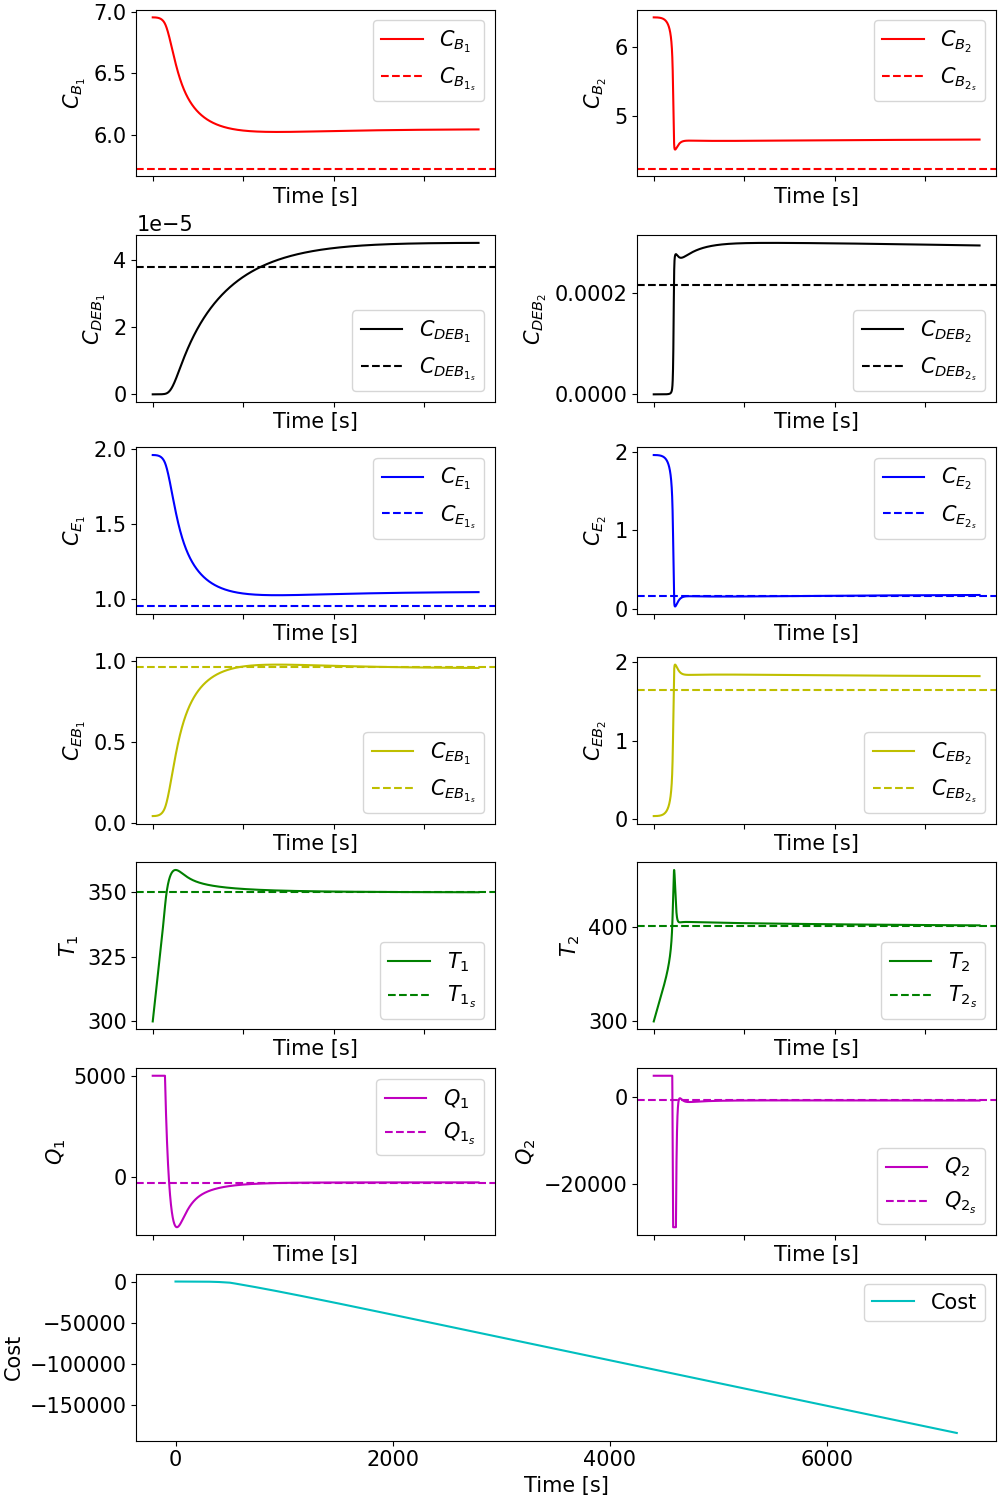

In [7]:
from controllers import *
%matplotlib widget
plt.rcParams['font.size'] = 15
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
plt.rcParams['ps.fonttype'] = 42   # Also for PostScript outputs
plt.rcParams['text.usetex'] = False
plt.gcf().align_ylabels()
plt.close('all')
fig = plt.figure(figsize = (10,15))
grid = fig.add_gridspec(7,2,hspace = 0)
axes = grid.subplots(sharex=True,sharey=False)

stateNames = np.array(['C_B_1_record', 'C_DEB_1_record', 'C_E_1_record', 'C_EB_1_record', 'T_1_record', 'C_B_2_record', 'C_DEB_2_record', 'C_E_2_record', 'C_EB_2_record', 'T_2_record']).reshape(2,5)
controlNames = ['Q_1_record', 'Q_2_record']
stateVariableNames = np.array(['C_B1d', 'C_DEB1d', 'C_E1d', 'C_EB1d', 'T_1d', 'C_B2d', 'C_DEB2d', 'C_E2d', 'C_EB2d', 'T_2d']).reshape(2,5)
controlVariableNames = ['Q1d', 'Q2d']
steadystateVariableNames = np.array(['C_B1s', 'C_DEB1s', 'C_E1s', 'C_EB1s', 'T_1s', 'C_B2s', 'C_DEB2s', 'C_E2s', 'C_EB2s', 'T_2s']).reshape(2,5)
steadycontrolVariableNames = ['Q1s', 'Q2s']

#Plotting the results
colors = ['r', 'k', 'b', 'y', 'g','m']
labels = ['C_{B', 'C_{DEB', 'C_{E', 'C_{EB', 'T','Q']

for i in range(6):
        for j in range(2):
            if i<4:
                latex_label = f"${labels[i]}_{{{j+1}}}}}$"
                latex_labels = f"${{{labels[i]}_{{{j+1}_{{s}}}}}}}}$"
            else:
                latex_label = f"${labels[i]}_{{{j+1}}}$"
                latex_labels = f"${{{labels[i]}_{{{j+1}_{{s}}}}}}$"
            if i==5:
                axes[i,j].plot(np.array(np.loadtxt(os.path.join('Results_PIcontrol-Unencrypted', f'{controlNames[j]}.txt'), delimiter = ",")[:np.loadtxt(os.path.join('Results_PIcontrol-Unencrypted', 'finalIteration.txt'), delimiter = ",",dtype=int)])+globals()[steadycontrolVariableNames[j]],colors[i],label=latex_label)
                axes[i,j].axhline(globals()[controlVariableNames[j]]+globals()[steadycontrolVariableNames[j]],color=colors[i],linestyle='--',label=latex_labels)
            else:    
                axes[i,j].plot(np.array(np.loadtxt(os.path.join('Results_PIcontrol-Unencrypted', f'{stateNames[j,i]}.txt'), delimiter = ",")[:np.loadtxt(os.path.join('Results_PIcontrol-Unencrypted', 'finalIteration.txt'), delimiter = ",",dtype=int)])+globals()[steadystateVariableNames[j,i]],colors[i],label=latex_label)
                axes[i,j].axhline(globals()[stateVariableNames[j,i]]+globals()[steadystateVariableNames[j,i]],color=colors[i],linestyle='--',label=latex_labels)
            axes[i,j].set_xlabel('Time [s]')
            axes[i,j].set_ylabel(latex_label)
            axes[i,j].legend()
for ax in axes[-1,:]:
    ax.remove()
cost_axis = fig.add_subplot(grid[-1, :])  # Span across both columns
cost_axis.plot(np.loadtxt(os.path.join('Results_PIcontrol-Unencrypted', 'costRecord.txt'), delimiter = ","), 'c', label='Cost')
cost_axis.set_xlabel('Time [s]')
cost_axis.set_ylabel('Cost')
# Adjust tick marks for cost_axis only
cost_axis.locator_params(axis='x', nbins=5)  # Fewer ticks on x-axis
cost_axis.locator_params(axis='y', nbins=5)  # Fewer ticks on y-axis
cost_axis.legend()
# Adjust the layout so plots do not overlap
#plt.tight_layout()
plt.show()